In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import timeit

In [2]:
#create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add lat_lngs to a list
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-80.35361039450072, 86.68640273748849),
 (-35.120124726429985, 22.602400942199978),
 (-78.07421122866623, 122.45637121493183),
 (6.5662951918046275, 106.10912509082243),
 (-42.12863933097002, 24.34585375180839),
 (10.36602441806491, 124.29947642145675),
 (45.43386963174791, -146.21552968405734),
 (-37.92589597847946, 16.866828250271624),
 (-7.19765486114747, -30.045895990194396),
 (23.48149716440659, 105.65503597150911),
 (-84.7824915195612, 76.81318064639862),
 (-73.89859894399014, 90.16940254317052),
 (45.95852267927938, -111.45032832939347),
 (-64.10651876693441, -103.03370139839402),
 (-37.986905646114074, -106.04232337732202),
 (-17.878926622723867, -173.8019638860378),
 (-16.659560121223024, 71.53223696553655),
 (-10.484787858144017, 16.10970100474708),
 (62.595806537787155, -97.52603851783078),
 (65.65693095626571, 25.99168283995678),
 (-22.949661488261725, 0.8462964571228042),
 (20.191628806448975, -100.29577983851479),
 (34.31736402017482, -69.74754641866193),
 (59.506247705

In [5]:
# Create a list for holding the cities
cities = []

In [6]:
#identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city in unique then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)

In [7]:
#print the city count
len(cities)

593

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=227bf88c8a943d1dfa6f5286d28d8bfa


In [9]:
#create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create the counters
record_count = 1 
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        
        #parse the json and retrieve data
        city_weather = requests.get(city_url).json()

        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        #convert the date to iso standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #append the city information in to city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    #if error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that the data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | george
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | bac lieu
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | calituban
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | pitimbu
Processing Record 10 of Set 1 | ha giang
Processing Record 11 of Set 1 | belgrade
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | neiafu
Processing Record 15 of Set 1 | quatre cocos
Processing Record 16 of Set 1 | malanje
City not found. Skipping...
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | haukipudas
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | coroneo
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | ustye
Processing Reco

Processing Record 34 of Set 4 | pimentel
Processing Record 35 of Set 4 | safakulevo
Processing Record 36 of Set 4 | husavik
Processing Record 37 of Set 4 | buqayq
City not found. Skipping...
Processing Record 38 of Set 4 | inhambane
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | ondjiva
Processing Record 42 of Set 4 | mnogovershinnyy
Processing Record 43 of Set 4 | trofors
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | khandyga
Processing Record 46 of Set 4 | witu
Processing Record 47 of Set 4 | tucupita
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | hofn
Processing Record 50 of Set 4 | saint-pierre
Processing Record 1 of Set 5 | axim
Processing Record 2 of Set 5 | anloga
Processing Record 3 of Set 5 | long beach
Processing Record 4 of Set 5 | ormond beach
Processing Record 5 of Set 5 | mingaora
Processing Record 6 of Set 5 | moose factory
Processi

Processing Record 22 of Set 8 | piquete
Processing Record 23 of Set 8 | liverpool
Processing Record 24 of Set 8 | hanstholm
Processing Record 25 of Set 8 | murakami
Processing Record 26 of Set 8 | japura
Processing Record 27 of Set 8 | liepaja
Processing Record 28 of Set 8 | turukhansk
Processing Record 29 of Set 8 | lala
Processing Record 30 of Set 8 | berdigestyakh
Processing Record 31 of Set 8 | dubrovnik
Processing Record 32 of Set 8 | mecca
Processing Record 33 of Set 8 | yeppoon
Processing Record 34 of Set 8 | mutum
Processing Record 35 of Set 8 | ponta delgada
Processing Record 36 of Set 8 | lahij
Processing Record 37 of Set 8 | fare
Processing Record 38 of Set 8 | karaul
City not found. Skipping...
Processing Record 39 of Set 8 | surt
Processing Record 40 of Set 8 | mutis
Processing Record 41 of Set 8 | bedesa
Processing Record 42 of Set 8 | smolenka
Processing Record 43 of Set 8 | halifax
Processing Record 44 of Set 8 | gravina in puglia
Processing Record 45 of Set 8 | kot sam

Processing Record 5 of Set 12 | kjopsvik
Processing Record 6 of Set 12 | westport
Processing Record 7 of Set 12 | kitimat
Processing Record 8 of Set 12 | warmbad
Processing Record 9 of Set 12 | sale
Processing Record 10 of Set 12 | port hedland
Processing Record 11 of Set 12 | pozo colorado
Processing Record 12 of Set 12 | bonthe
Processing Record 13 of Set 12 | yamada
Processing Record 14 of Set 12 | pribelskiy
City not found. Skipping...
Processing Record 15 of Set 12 | weligama
Processing Record 16 of Set 12 | tuatapere
Processing Record 17 of Set 12 | koutiala
Processing Record 18 of Set 12 | buchanan
Processing Record 19 of Set 12 | zhuhai
City not found. Skipping...
Processing Record 20 of Set 12 | cairns
Processing Record 21 of Set 12 | utiroa
City not found. Skipping...
Processing Record 22 of Set 12 | lake charles
Processing Record 23 of Set 12 | leshukonskoye
Processing Record 24 of Set 12 | suba
Processing Record 25 of Set 12 | fredericksburg
Processing Record 26 of Set 12 |

In [10]:
len(city_data)

528

In [11]:
#convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,42.04,67,59,6.15,AU,2021-10-25 16:28:37
1,George,-33.9630,22.4617,62.15,82,40,17.27,ZA,2021-10-25 16:28:37
2,New Norfolk,-42.7826,147.0587,49.50,97,49,2.42,AU,2021-10-25 16:28:37
3,Bac Lieu,9.2850,105.7244,80.19,81,90,6.42,VN,2021-10-25 16:28:38
4,Kruisfontein,-34.0033,24.7314,65.88,72,0,16.73,ZA,2021-10-25 16:28:38
5,Calituban,10.2400,124.2919,80.69,78,71,9.78,PH,2021-10-25 16:28:38
6,Kodiak,57.7900,-152.4072,38.71,87,40,4.61,US,2021-10-25 16:28:39
7,Hermanus,-34.4187,19.2345,74.89,65,67,20.20,ZA,2021-10-25 16:28:39
8,Pitimbu,-7.4706,-34.8086,86.59,56,17,14.85,BR,2021-10-25 16:28:39
9,Ha Giang,22.8333,104.9833,68.27,90,72,0.78,VN,2021-10-25 16:28:40


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_data_df[new_column_order]
city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-10-25 16:28:37,-33.6500,115.3333,42.04,67,59,6.15
1,George,ZA,2021-10-25 16:28:37,-33.9630,22.4617,62.15,82,40,17.27
2,New Norfolk,AU,2021-10-25 16:28:37,-42.7826,147.0587,49.50,97,49,2.42
3,Bac Lieu,VN,2021-10-25 16:28:38,9.2850,105.7244,80.19,81,90,6.42
4,Kruisfontein,ZA,2021-10-25 16:28:38,-34.0033,24.7314,65.88,72,0,16.73
5,Calituban,PH,2021-10-25 16:28:38,10.2400,124.2919,80.69,78,71,9.78
6,Kodiak,US,2021-10-25 16:28:39,57.7900,-152.4072,38.71,87,40,4.61
7,Hermanus,ZA,2021-10-25 16:28:39,-34.4187,19.2345,74.89,65,67,20.20
8,Pitimbu,BR,2021-10-25 16:28:39,-7.4706,-34.8086,86.59,56,17,14.85
9,Ha Giang,VN,2021-10-25 16:28:40,22.8333,104.9833,68.27,90,72,0.78


In [14]:
#create the output file in csv format
output_data_file = "weather_data/cities.csv"

#export the city_data into the csv
city_df.to_csv(output_data_file, index_label='City_ID')

In [15]:
#extract relevant fields from the df for plotting
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

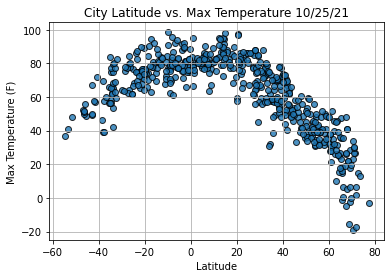

In [16]:
#import the time module
import time

#build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

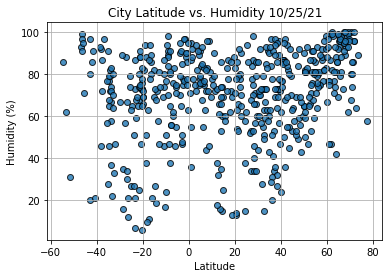

In [17]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

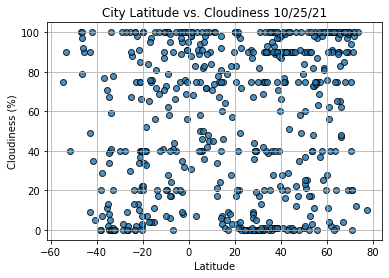

In [18]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

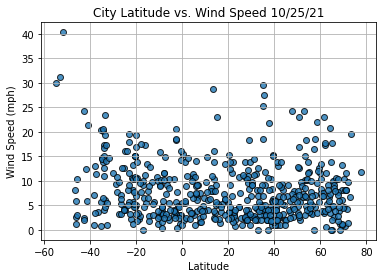

In [19]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [20]:
#import the linear regression module
from scipy.stats import linregress

#Create a function to create and perform a linear regression on the weather data with a line plot
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Create and run the regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line y-values from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #create the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    #Create the scatter plot with regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    
    plt.show()

In [21]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Bac Lieu,9.2850,105.7244,80.19,81,90,6.42,VN,2021-10-25 16:28:38
5,Calituban,10.2400,124.2919,80.69,78,71,9.78,PH,2021-10-25 16:28:38
6,Kodiak,57.7900,-152.4072,38.71,87,40,4.61,US,2021-10-25 16:28:39
9,Ha Giang,22.8333,104.9833,68.27,90,72,0.78,VN,2021-10-25 16:28:40
10,Belgrade,44.8040,20.4651,53.65,53,0,1.99,RS,2021-10-25 16:28:40


In [22]:
len(northern_hemi_df)

353

In [23]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,42.04,67,59,6.15,AU,2021-10-25 16:28:37
1,George,-33.9630,22.4617,62.15,82,40,17.27,ZA,2021-10-25 16:28:37
2,New Norfolk,-42.7826,147.0587,49.50,97,49,2.42,AU,2021-10-25 16:28:37
4,Kruisfontein,-34.0033,24.7314,65.88,72,0,16.73,ZA,2021-10-25 16:28:38
7,Hermanus,-34.4187,19.2345,74.89,65,67,20.20,ZA,2021-10-25 16:28:39


In [24]:
len(southern_hemi_df)

175

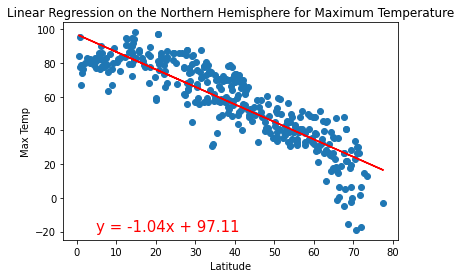

In [25]:
#Linear regression on the N hemisphere (Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (5, -20))


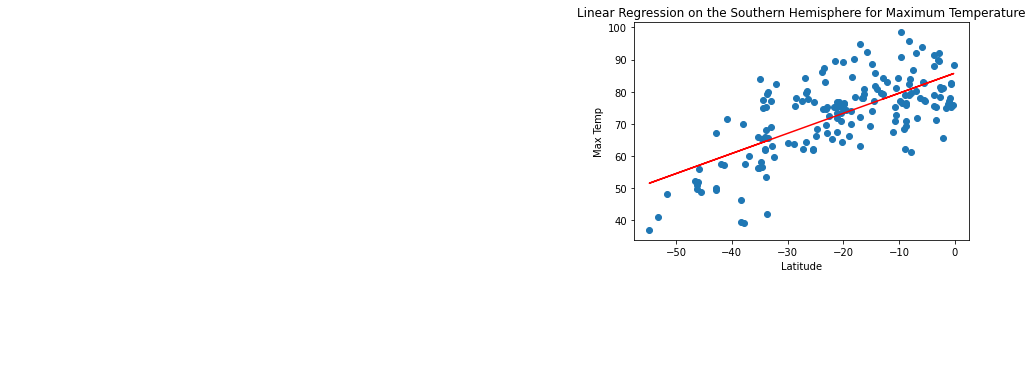

In [26]:
#Linear regression on the S hemisphere (Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-170, -5))


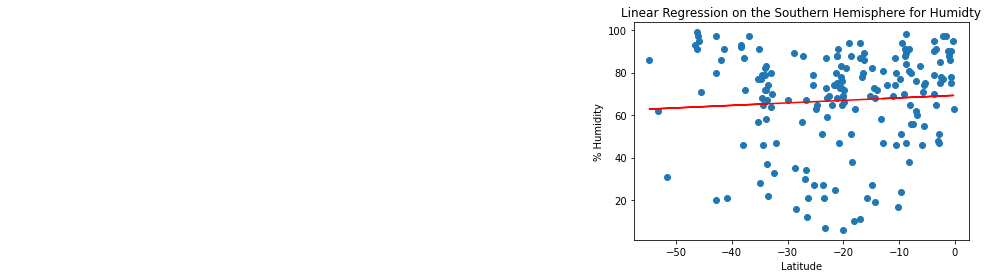

In [27]:
#Linear regression on the S hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Humidty', '% Humidity', (-170, 10))


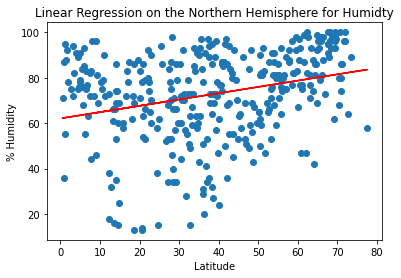

In [28]:
#Linear regression on the N hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Humidty', '% Humidity', (30, 0))


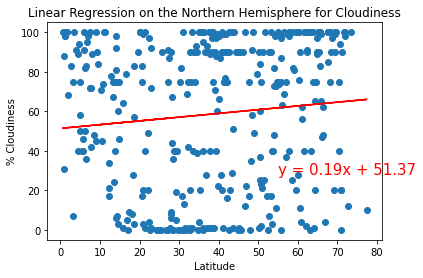

In [29]:
#Linear regression on the N hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Cloudiness"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Cloudiness', '% Cloudiness', (55, 28))


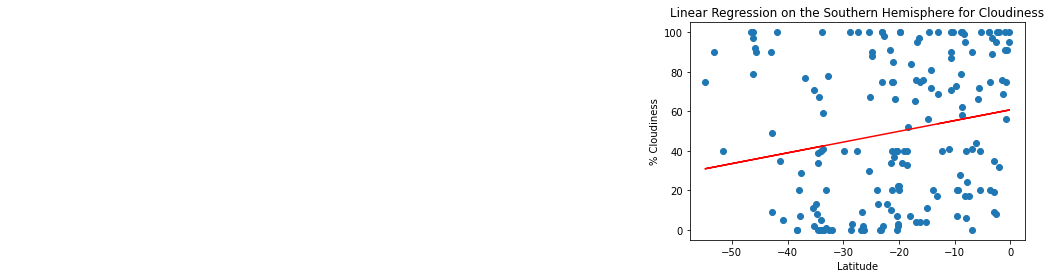

In [30]:
#Linear regression on the S hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Cloudiness"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Cloudiness', '% Cloudiness', (-180, 8))


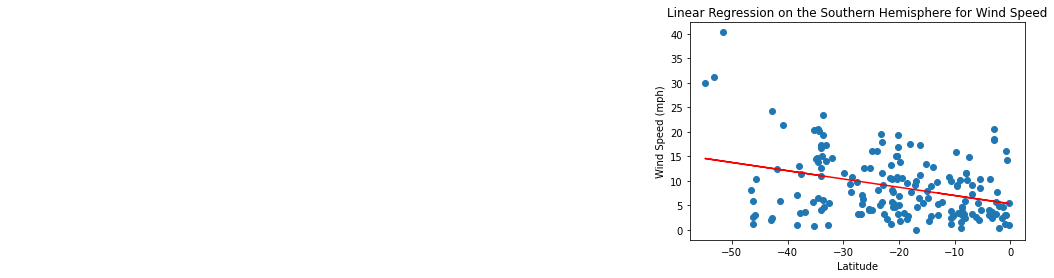

In [31]:
#Linear regression on the S hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Wind Speed"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed (mph)', (-180, 22))


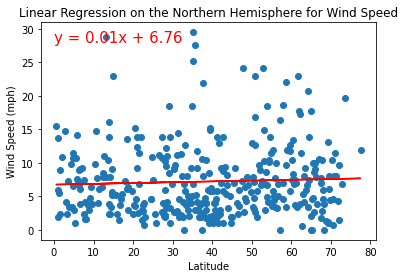

In [32]:
#Linear regression on the N hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]

#Call and use the create function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)', (0, 28))
